This is the notebook related to HMM data analysis. To run this, please uncomment all the cells an press 'Run all' button.

In [1]:
# Set the path and input parameters
import os
directory = os.getcwd() # the main directory of the project

# The credentials for the remote cluster
name = 'alina'
server = 'ecate'

In [2]:
# Importing the libraries and functions
from functions import *

# HMM analysis

Here we will construct and analyze HMM models retrieved from MSAs. We will utilize several databases as sources to enhance our analysis and gain valuable insights from the generated HMM profiles.

## 1. hmmsearch results analysis

After performing `hmmsearch` against RP 75%, we retrieve the dataframes `hmmsearch_results_blast` and `hmmsearch_results_clustal` with the statistics.

In [4]:
# Retrieve the dataframe with the hmmsearch results - BLAST
hmmsearch_results_blast = pd.read_csv('{}/results/hmms/hmmsearch/hmmsearch_results_blast.csv'.format(directory))
hmmsearch_results_blast.head()

,E-value,score,bias,E-value.1,score.1,bias.1,exp,N,Sequence,hmm_from,hmm_to,hmm_length,ali_from,ali_to,ali_length,env_from,env_to,env_length
0,0.0,5480.3,5662.4,0.000038,35.9,8.9,378.4,366,A0A7M7NU54,1,35,35,246,282,37,246,284,39
1,0.0,2495.1,2437.9,0.000044,35.7,5.8,148.9,146,A0A7I8W901,1,34,34,273,306,34,273,309,37
2,0.0,2055.8,1958.2,0.000010,37.7,8.0,138.2,129,A0A8B7ZVU6,1,34,34,345,378,34,345,381,37
3,0.0,2040.0,1932.9,0.000010,37.7,8.0,136.2,128,A0A8B7ZRF1,1,32,32,382,413,32,382,416,35
4,0.0,1770.3,1740.7,0.000011,37.6,9.4,122.3,113,A0A8B7ZPY7,1,34,34,345,378,34,345,381,37


In [5]:
# Retrieve the dataframe with the hmmsearch results - ClustalOmega
hmmsearch_results_clustal = pd.read_csv('{}/results/hmms/hmmsearch/hmmsearch_results_clustal.csv'.format(directory))
hmmsearch_results_clustal.head()

,E-value,score,bias,E-value.1,score.1,bias.1,exp,N,Sequence,hmm_from,hmm_to,hmm_length,ali_from,ali_to,ali_length,env_from,env_to,env_length
0,3.800000e-32,122.0,13.1,4.400000e-32,121.8,13.1,1.0,1,A0A8C7BFT3,1,61,61,9,69,61,9,70,62
1,2.400000e-31,119.5,13.6,9.900000e-31,117.5,13.6,2.2,1,A0A3Q7NSQ2,1,62,62,352,413,62,352,413,62
2,3.000000e-31,119.2,13.6,1.400000e-30,117.0,13.6,2.3,1,A0A2U3ZCX9,1,62,62,451,512,62,451,512,62
3,3.000000e-31,119.1,13.6,1.400000e-30,117.0,13.6,2.2,1,A0A2U3VQT6,1,62,62,454,515,62,454,515,62
4,3.100000e-31,119.1,13.6,1.400000e-30,117.0,13.6,2.2,1,A0A3Q7P1S3,1,62,62,451,512,62,451,512,62


In [24]:
# Compare HMMs and alignments lengths - BLAST
print('The length of the dataframe:', len(hmmsearch_results_blast))
print('The number of HMMs matching the alignment length:', len(hmmsearch_results_blast[hmmsearch_results_blast['hmm_length'] == hmmsearch_results_blast['ali_length']]))
print('The number of HMMs longer than the alignment length:', len(hmmsearch_results_blast[hmmsearch_results_blast['hmm_length'] > hmmsearch_results_blast['ali_length']]))
print('The number of HMMs shorter than the alignment length:', len(hmmsearch_results_blast[hmmsearch_results_blast['hmm_length'] < hmmsearch_results_blast['ali_length']]))

The length of the dataframe: 189624
The number of HMMs matching the alignment length: 98505
The number of HMMs longer than the alignment length: 22706
The number of HMMs shorter than the alignment length: 68413


In [27]:
# Analyse the cases with the shorter HMMs - BLAST
shorter_blast = hmmsearch_results_blast[hmmsearch_results_blast['hmm_length'] < hmmsearch_results_blast['ali_length']]
shorter_blast.head()

,E-value,score,bias,E-value.1,score.1,bias.1,exp,N,Sequence,hmm_from,hmm_to,hmm_length,ali_from,ali_to,ali_length,env_from,env_to,env_length
0,0.0,5480.3,5662.4,3.800000e-05,35.9,8.9,378.4,366,A0A7M7NU54,1,35,35,246,282,37,246,284,39
9,0.0,1398.6,2409.0,8.800000e-04,31.5,8.9,150.1,127,A0A7M7P8Y1,1,35,35,218,253,36,218,255,38
14,0.0,1248.3,893.5,1.800000e-07,43.3,10.5,63.6,60,A0A7M7MYY4,1,34,34,206,240,35,206,243,38
17,0.0,1126.5,781.5,2.200000e-07,43.1,4.9,56.2,54,A0A7M7SY98,1,35,35,25,60,36,25,62,38
19,0.0,1073.9,756.6,2.100000e-07,43.1,4.9,54.2,52,A0A7M7NRP4,1,35,35,25,60,36,25,62,38


In [28]:
# Analyse the cases with the longer HMMs - BLAST
longer_blast = hmmsearch_results_blast[hmmsearch_results_blast['hmm_length'] > hmmsearch_results_blast['ali_length']]
longer_blast.head()

,E-value,score,bias,E-value.1,score.1,bias.1,exp,N,Sequence,hmm_from,hmm_to,hmm_length,ali_from,ali_to,ali_length,env_from,env_to,env_length
95,3.900000e-247,810.3,939.9,5.300000e-06,38.6,7.3,65.5,57,A0A7M7NUZ1,1,35,35,142,175,34,142,177,36
140,5.400000e-195,643.4,346.5,8.800000e-08,44.3,9.7,22.5,22,A0A6J8EPV6,1,34,34,533,565,33,533,568,36
246,2.600000e-149,497.2,334.5,6.000000e-05,35.3,10.6,20.3,19,A0A2R2MK42,1,34,34,73,105,33,73,107,35
249,8.400000e-149,495.6,442.3,2.400000e-02,26.9,9.4,31.2,31,A0A6P4ZRA4,1,33,33,173,204,32,173,206,34
490,4.000000e-138,461.4,516.2,7.900000e-07,41.3,6.5,35.0,29,D6X555,1,34,34,76,108,33,76,110,35


In [29]:
# Compare HMMs and alignments lengths - ClustalOmega
print('The length of the dataframe:', len(hmmsearch_results_clustal))
print('The number of HMMs matching the alignment length:', len(hmmsearch_results_clustal[hmmsearch_results_clustal['hmm_length'] == hmmsearch_results_clustal['ali_length']]))
print('The number of HMMs longer than the alignment length:', len(hmmsearch_results_clustal[hmmsearch_results_clustal['hmm_length'] > hmmsearch_results_clustal['ali_length']]))
print('The number of HMMs shorter than the alignment length:', len(hmmsearch_results_clustal[hmmsearch_results_clustal['hmm_length'] < hmmsearch_results_clustal['ali_length']]))

The length of the dataframe: 211312
The number of HMMs matching the alignment length: 99892
The number of HMMs longer than the alignment length: 27117
The number of HMMs shorter than the alignment length: 84303


In [30]:
# Analyse the cases with the shorter HMMs - ClustalOmega
shorter_clustal = hmmsearch_results_clustal[hmmsearch_results_clustal['hmm_length'] < hmmsearch_results_clustal['ali_length']]
shorter_clustal.head()

,E-value,score,bias,E-value.1,score.1,bias.1,exp,N,Sequence,hmm_from,hmm_to,hmm_length,ali_from,ali_to,ali_length,env_from,env_to,env_length
132,7.100000e-23,92.3,11.6,7.100000e-23,92.3,11.6,3.1,2,F6XLV7,1,62,62,480,542,63,480,542,63
133,1.600000e-22,91.2,16.1,1.600000e-22,91.2,16.1,2.4,1,A0A1A6HSD7,2,62,61,244,306,63,243,306,64
139,5.600000e-21,86.2,15.6,2.000000e-20,84.5,15.6,2.0,1,G3HIE4,2,62,61,448,510,63,447,510,64
141,1.400000e-20,85.0,16.6,3.600000e-20,83.6,16.6,1.8,1,A0A6J0DUB0,1,62,62,461,525,65,461,525,65
142,1.500000e-20,84.9,16.6,3.700000e-20,83.6,16.6,1.7,1,A0A6J0DV05,1,62,62,467,531,65,467,531,65


In [31]:
# Analyse the cases with the longer HMMs - ClustalOmega
longer_clustal = hmmsearch_results_clustal[hmmsearch_results_clustal['hmm_length'] > hmmsearch_results_clustal['ali_length']]
longer_clustal.head()

,E-value,score,bias,E-value.1,score.1,bias.1,exp,N,Sequence,hmm_from,hmm_to,hmm_length,ali_from,ali_to,ali_length,env_from,env_to,env_length
63,7.300000e-29,111.5,13.0,7.300000e-29,111.5,13.0,2.2,1,A0A8J6A1V4,1,62,62,444,504,61,444,504,61
80,5.000000e-28,108.8,14.7,5.000000e-28,108.8,14.7,2.5,1,A0A8C9H9L8,1,62,62,445,505,61,445,505,61
87,3.100000e-27,106.3,14.4,1.100000e-26,104.5,14.4,2.1,1,A0A8C8YAS1,1,62,62,451,511,61,451,511,61
106,3.900000e-26,102.7,15.2,1.700000e-25,100.7,15.2,2.2,1,A0A6G1AVP8,1,62,62,437,497,61,437,497,61
115,1.600000e-25,100.8,12.6,5.000000e-25,99.2,12.6,2.0,1,A0A8B7VRK7,2,62,61,423,481,59,422,481,60


## 3. HMM and Pfam comparison

We took the results of `hmmsearch` and performed a search against Interpro database. Thus we obtained the Pfam domains corresponding to the results from `hmmsearch`.

In the following dataframes I directly compared two models: Pfam-HMM and DisProt-HMM. 

3 types of overlap were calculated:
- the common part divided by *Pfam-HMM* length (`overl_pfam`)
- the common part divided by *DisProt-HMM* length (`overl_hmm`)
- and the overall overlap: the common part divided by the **maximum length** combined by Pfam-HMM and DisProt-HMM lengths together (`overl_perc`).

In [32]:
# Load a dataframe of Pfam regions - BLAST
pfam_blast = pd.read_csv('{}/results/pfam/pfam_overlap/pfam_blast.csv'.format(directory))
print('The number of regions for the hmmsearch results on BLAST output in Interpro:', len(pfam_blast))
print('The number of retrieved Pfam domains:', len(set(pfam_blast['pfam_id'])))
pfam_blast.head()

The number of regions for the hmmsearch results on BLAST output in Interpro: 950184
The number of retrieved Pfam domains: 773


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,hmm_from,hmm_to,hmm_length,ali_from,...,ali_length,env_from,env_to,env_length,overl_len,overl_pfam,overl_ali,non_overl_len,overl_perc,overlap_sym
0,A0A010Q304,PF02775,IPR011766,499,646,148,1,41,41,650,...,41,650,690,41,0,0.00,0.0,196,0.00,0.0
1,A0A010Q304,PF02775,IPR011766,499,646,148,1,16,16,583,...,16,583,598,16,16,10.81,100.0,133,10.81,0.2
2,A0A010Q304,PF00205,IPR012000,289,434,146,1,41,41,650,...,41,650,690,41,0,0.00,0.0,618,0.00,0.0
3,A0A010Q304,PF00205,IPR012000,289,434,146,1,16,16,583,...,16,583,598,16,0,0.00,0.0,459,0.00,0.0
4,A0A010Q304,PF02776,IPR012001,91,205,115,1,41,41,650,...,41,650,690,41,0,0.00,0.0,1045,0.00,0.0


In [33]:
# Load a dataframe of Pfam regions - ClustalOmega
pfam_clustal = pd.read_csv('{}/results/pfam/pfam_overlap/pfam_clustal.csv'.format(directory))
print('The number of regions for the hmmsearch results on ClustalOmega output in Interpro:', len(pfam_clustal))
print('The number of retrieved Pfam domains:', len(set(pfam_clustal['pfam_id'])))
pfam_clustal.head()

The number of regions for the hmmsearch results on ClustalOmega output in Interpro: 1110208
The number of retrieved Pfam domains: 869


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,hmm_from,hmm_to,hmm_length,ali_from,...,ali_length,env_from,env_to,env_length,overl_len,overl_pfam,overl_ali,non_overl_len,overl_perc,overlap_sym
0,A0A010Q304,PF02775,IPR011766,499,646,148,1,16,16,583,...,16,583,598,16,16,10.81,100.0,133,10.81,0.2
1,A0A010Q304,PF02775,IPR011766,499,646,148,1,40,40,650,...,40,650,690,41,0,0.00,0.0,195,0.00,0.0
2,A0A010Q304,PF00205,IPR012000,289,434,146,1,16,16,583,...,16,583,598,16,0,0.00,0.0,459,0.00,0.0
3,A0A010Q304,PF00205,IPR012000,289,434,146,1,40,40,650,...,40,650,690,41,0,0.00,0.0,617,0.00,0.0
4,A0A010Q304,PF02776,IPR012001,91,205,115,1,16,16,583,...,16,583,598,16,0,0.00,0.0,886,0.00,0.0


In [42]:
# Compare overlapping and non-overlapping Pfam IDs - BLAST
print('The number of novel Pfam IDs (without overlap with DisProt HMMs):', pfam_blast[pfam_blast['overl_len'] == 0]['pfam_id'].nunique())
print('The number of Pfam IDs overlapping with DisProt HMMs:', pfam_blast[pfam_blast['overl_len'] != 0]['pfam_id'].nunique())

The number of novel Pfam IDs (without overlap with DisProt HMMs): 768
The number of Pfam IDs overlapping with DisProt HMMs: 92


In [43]:
# Compare overlapping and non-overlapping Pfam IDs - ClustalOmega
print('The number of novel Pfam IDs (without overlap with DisProt HMMs):', pfam_clustal[pfam_clustal['overl_len'] == 0]['pfam_id'].nunique())
print('The number of Pfam IDs overlapping with DisProt HMMs:', pfam_clustal[pfam_clustal['overl_len'] != 0]['pfam_id'].nunique())

The number of novel Pfam IDs (without overlap with DisProt HMMs): 862
The number of Pfam IDs overlapping with DisProt HMMs: 96


We can see that the ClustalOmega alignments show more Pfam IDs non overlapping DisProt HMMs.

### Models comparison (Pfam-HMM and DisProt-HMM)

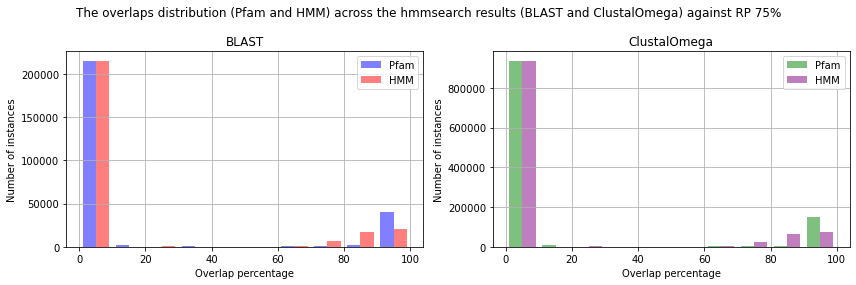

In [14]:
# Plot the histogram of overlaps % for Pfam and HMM
plt.rcParams['figure.figsize'] = [12, 4]
fig, ax = plt.subplots(1, 2, sharex=True)

ax[0].hist([pfam_blast['overl_pfam'], pfam_blast['overl_ali']],
             bins=10, alpha=0.5, color=['blue', 'red'],
             label=['Pfam', 'HMM'])

ax[1].hist([pfam_clustal['overl_pfam'], pfam_clustal['overl_ali']],
             bins=10, alpha=0.5, color=['green', 'purple'],
             label=['Pfam', 'HMM'])

ax[0].set_xlabel('Overlap percentage')
ax[1].set_xlabel('Overlap percentage')
ax[0].set_ylabel('Number of instances')
ax[1].set_ylabel('Number of instances')

ax[0].set_title('BLAST')
ax[1].set_title('ClustalOmega')

ax[0].legend()
ax[1].legend()

ax[0].grid(True)
ax[1].grid(True)

plt.suptitle('The overlaps distribution (Pfam and HMM) across the hmmsearch results (BLAST and ClustalOmega) against RP 75%')
plt.tight_layout()
plt.show()

In [15]:
# Calculate how many models do not overlap
zero_count_blast = (pfam_blast['overl_perc'] == 0).sum()
total_count_blast = len(pfam_blast)
percentage_blast = '{:.2f}'.format((zero_count_blast / total_count_blast) * 100)

zero_count_clustal = (pfam_clustal['overl_perc'] == 0).sum()
total_count_clustal = len(pfam_clustal)
percentage_clustal = '{:.2f}'.format((zero_count_clustal / total_count_clustal) * 100)

print('Non-overlapping models count (BLAST): {}'.format(zero_count_blast), '\n'
     'The share of non-overlapping models (BLAST): {}%'.format(percentage_blast))
print('Non-overlapping models count (ClustalOmega): {}'.format(zero_count_clustal), '\n'
     'The share of non-overlapping models (ClustalOmega): {}%'.format(percentage_clustal))

Non-overlapping models count (BLAST): 213839 
The share of non-overlapping models (BLAST): 81.47%
Non-overlapping models count (ClustalOmega): 930534 
The share of non-overlapping models (ClustalOmega): 83.82%


In [16]:
# Non-zero (nz) overlaps - BLAST
nz_blast = pfam_blast[pfam_blast['overl_perc'] != 0]
print('The number of overlapping models (BLAST):', len(nz_blast))
nz_blast.head()

The number of overlapping models (BLAST): 48643


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,hmm_from,hmm_to,hmm_length,ali_from,...,ali_length,env_from,env_to,env_length,overl_len,overl_pfam,overl_ali,non_overl_len,overl_perc,overlap_sym
1,A0A010Q304,PF02775,IPR011766,499,646,148,1,16,16,583,...,16.0,583.0,598.0,16.0,16.0,10.81,100.00,133.0,10.81,0.20
6,A0A010Q7P7,PF00018,IPR001452,435,481,47,10,65,56,428,...,58.0,424.0,487.0,64.0,47.0,100.00,81.03,12.0,81.03,0.90
10,A0A010QT56,PF00018,IPR001452,707,751,45,17,67,51,707,...,51.0,700.0,758.0,59.0,45.0,100.00,88.24,7.0,88.24,0.94
14,A0A010R8W1,PF00018,IPR001452,956,1004,49,17,65,49,957,...,52.0,954.0,1010.0,57.0,48.0,97.96,92.31,6.0,90.57,0.95
15,A0A010RFU4,PF00018,IPR001452,229,273,45,12,68,57,225,...,57.0,218.0,284.0,67.0,45.0,100.00,78.95,13.0,78.95,0.88


In [17]:
nz_blast[nz_blast['overlap_sym'] == 1].drop(columns=['hmm_from', 'hmm_to', 'hmm_length']).head()

,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,ali_from,ali_to,ali_length,env_from,env_to,env_length,overl_len,overl_pfam,overl_ali,non_overl_len,overl_perc,overlap_sym
108,A0A016TP50,PF00431,IPR000859,480,588,109,481,588.0,108.0,477.0,591.0,115.0,108.0,99.08,100.0,2.0,99.08,1.0
1605,A0A060XUF2,PF00008,IPR000742,22,45,24,22,45.0,24.0,22.0,59.0,38.0,24.0,100.00,100.0,1.0,100.00,1.0
2117,A0A067NS16,PF00018,IPR001452,642,688,47,642,688.0,47.0,637.0,693.0,57.0,47.0,100.00,100.0,1.0,100.00,1.0
2747,A0A074ZWC7,PF00431,IPR000859,14,119,106,14,119.0,106.0,9.0,122.0,114.0,106.0,100.00,100.0,1.0,100.00,1.0
2764,A0A075AFY3,PF00431,IPR000859,3,113,111,3,113.0,111.0,3.0,116.0,114.0,111.0,100.00,100.0,1.0,100.00,1.0


In [18]:
# Non-zero (nz) overlaps - ClustalOmega
nz_clustal = pfam_clustal[pfam_clustal['overl_perc'] != 0]
print('The number of overlapping models (ClustalOmega):', len(nz_clustal))
nz_clustal.head()

The number of overlapping models (ClustalOmega): 179674


,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,hmm_from,hmm_to,hmm_length,ali_from,...,ali_length,env_from,env_to,env_length,overl_len,overl_pfam,overl_ali,non_overl_len,overl_perc,overlap_sym
0,A0A010Q304,PF02775,IPR011766,499,646,148,1,16,16,583,...,16,583,598,16,16,10.81,100.00,133,10.81,0.20
6,A0A010Q7P7,PF00018,IPR001452,435,481,47,10,65,56,428,...,58,424,487,64,47,100.00,81.03,12,81.03,0.90
8,A0A010QBJ0,PF00018,IPR001452,1080,1125,46,18,68,51,1082,...,51,1073,1135,63,44,95.65,86.27,10,83.02,0.91
11,A0A010QT56,PF00018,IPR001452,707,751,45,16,66,51,706,...,51,694,758,65,45,100.00,88.24,7,88.24,0.94
15,A0A010R8W1,PF00018,IPR001452,956,1004,49,19,66,48,959,...,51,950,1010,61,46,93.88,90.20,9,85.19,0.92


In [19]:
nz_clustal[nz_clustal['overlap_sym'] == 1].drop(columns=['hmm_from', 'hmm_to', 'hmm_length']).head()

,uniprot_id,pfam_id,ipr_id,start_pfam,end_pfam,length_pfam,ali_from,ali_to,ali_length,env_from,env_to,env_length,overl_len,overl_pfam,overl_ali,non_overl_len,overl_perc,overlap_sym
33,A0A015IC41,PF14604,IPR001452,574,623,50,574,623,50,565,627,63,50,100.0,100.0,1,100.0,1.0
66,A0A016RSC0,PF00431,IPR000859,40,148,109,40,148,109,30,151,122,109,100.0,100.0,1,100.0,1.0
68,A0A016RSI1,PF00431,IPR000859,40,148,109,40,148,109,30,151,122,109,100.0,100.0,1,100.0,1.0
70,A0A016RT37,PF00431,IPR000859,40,148,109,40,148,109,30,151,122,109,100.0,100.0,1,100.0,1.0
72,A0A016RTH4,PF00431,IPR000859,40,148,109,40,148,109,30,151,122,109,100.0,100.0,1,100.0,1.0


### Models comparison with DisProt
In this part I've taken into account the overlap between two models (Pfam-HMM and DisProt-HMM) with the regions given in the curated DisProt database.

In [20]:
print('The mean of HMM overlap with both Pfam-HMM and DisProt-HMM (BLAST): {:.2f}%'.format(pfam_blast['overl_perc'].mean()))
print('The mean of HMM overlap with both Pfam-HMM and DisProt-HMM (ClustalOmega): {:.2f}%'.format(pfam_clustal['overl_perc'].mean()))

The mean of HMM overlap with both Pfam-HMM and DisProt-HMM (BLAST): 14.51%
The mean of HMM overlap with both Pfam-HMM and DisProt-HMM (ClustalOmega): 12.72%


In [21]:
print('The mean of HMM overlap with Pfam-HMM (BLAST): {:.2f}%'.format(pfam_blast['overl_pfam'].mean()))
print('The mean of HMM overlap with Pfam-HMM (ClustalOmega): {:.2f}%'.format(pfam_clustal['overl_pfam'].mean()))

The mean of HMM overlap with Pfam-HMM (BLAST): 16.50%
The mean of HMM overlap with Pfam-HMM (ClustalOmega): 14.47%


In [22]:
print('The mean of HMM overlap with Disprot-HMM (BLAST): {:.2f}%'.format(pfam_blast['overl_ali'].mean()))
print('The mean of HMM overlap with Disprot-HMM (ClustalOmega): {:.2f}%'.format(pfam_clustal['overl_ali'].mean()))

The mean of HMM overlap with Disprot-HMM (BLAST): 15.64%
The mean of HMM overlap with Disprot-HMM (ClustalOmega): 13.63%


In [23]:
print('The difference between mean of HMM and Pfam overlap (BLAST): {:.2f}%'.format(pfam_blast['overl_ali'].mean() - pfam_blast['overl_pfam'].mean()))
print('The difference between mean of HMM and Pfam overlap (ClustalOmega): {:.2f}%'.format(pfam_clustal['overl_ali'].mean() - pfam_clustal['overl_pfam'].mean()))

The difference between mean of HMM and Pfam overlap (BLAST): -0.86%
The difference between mean of HMM and Pfam overlap (ClustalOmega): -0.84%
